In [1]:
%matplotlib inline

# Filter warnings
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import csv
import pandas as pd

plt.rcParams.update({'font.size': 15})

# Import custom classes
%run -i '../src/transfxns.py'
%run -i '../src/unsup_ml.py'

# Instantiate the classes
transfxn = TransformationPipeline()
model = UnsupervisedModels()
scaler = StandardScaler()

In [6]:
df = pd.read_csv('eps_all.csv')
ip_list = df['ip'].unique()
#print(ip_list)

# Sort the DataFrame by timestamp if it's not already sorted
#df = df.sort_values(by='ip')
#print(df)

for ip in ip_list:
    #print(ip)
    temp_df = df[df['ip']==ip]
    #print(temp_df)
    #print(len(temp_df))

df = df[df['ip']=='192.168.61.1'].sort_values(by='create_time')

min_value = 0.2
max_value = 0.8
max_count = df['count'].max()
min_count = df['count'].min()
print(max_count)
print(min_count)


print(df)

#Transform and scale data
X_scaled, _, feat_nm = transfxn.preprocessing(df, df)

99932156
9528
                  ip  count          create_time
2       192.168.61.1  24310  2023-01-22 00:00:00
17      192.168.61.1  26209  2023-01-22 01:00:00
31      192.168.61.1  23022  2023-01-22 02:00:00
45      192.168.61.1  23423  2023-01-22 03:00:00
59      192.168.61.1  20942  2023-01-22 04:00:00
...              ...    ...                  ...
110153  192.168.61.1  50752  2024-01-22 10:00:00
110165  192.168.61.1  52444  2024-01-22 11:00:00
110178  192.168.61.1  53520  2024-01-22 12:00:00
110192  192.168.61.1  98661  2024-01-22 13:00:00
110205  192.168.61.1  70507  2024-01-22 14:00:00

[8467 rows x 3 columns]


8448


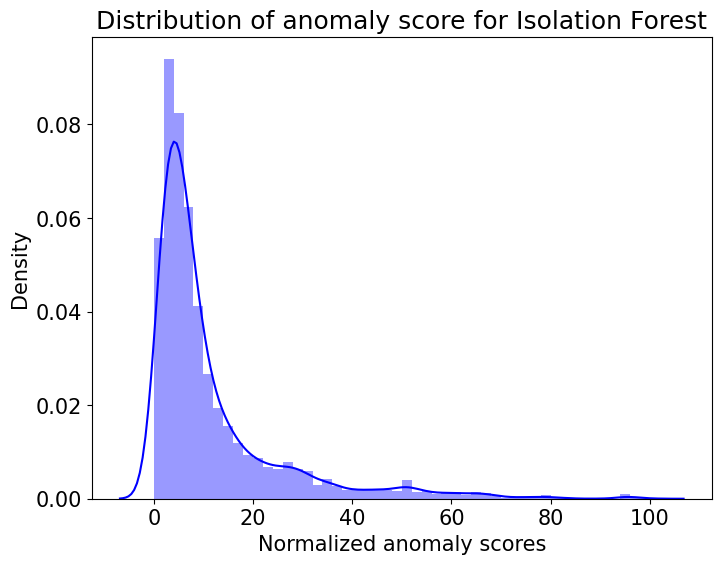

           count     MA_10     MA_20       STD  anomaly_score
48555   0.200102  0.200100  0.230138  0.200069      67.159250
45996   0.200128  0.200102  0.230107  0.200072      66.332933
48581   0.200136  0.200107  0.230109  0.200074      66.098508
79936   0.200242  0.200121  0.230108  0.200135      66.167489
10578   0.200146  0.200132  0.230109  0.200113      64.139372
...          ...       ...       ...       ...            ...
75866   0.200368  0.200182  0.200216  0.200273      10.093179
83549   0.200902  0.200251  0.200257  0.200744      31.357467
87940   0.200196  0.200248  0.200259  0.200746       8.409462
100864  0.200191  0.200253  0.200261  0.200739       8.897660
55294   0.200113  0.200259  0.200263  0.200725       7.640730

[8448 rows x 5 columns]


In [4]:
# Train model
if_scores, if_y_pred = model.iforest(X_scaled, n_estimators = 100, random_state= 42)
print(len(if_y_pred))
# Add anomaly score to the data
if_df = df.copy()
if_df['anomaly_score'] = if_scores

# Plot anomaly score distribution
model.plot_dist(if_df.anomaly_score, color = 'b', 
                title = 'Distribution of anomaly score for Isolation Forest')

print(if_df)